# Pseudo potenciales

Nicolas Unger

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)

In [18]:
# Función Radial Hidrogénica (con hipergeométricas)

def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R

## Saco la funcion radial del fundamental del Sodio (Na)

Lo trato primero como un hidrogenoide ya que tiene solo un electron de valencia en el estado 3s

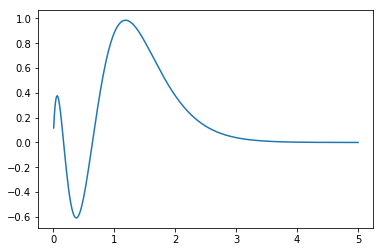

In [63]:
nsize = 500
xmin = 0.01
xmax = 5
x = np.linspace(xmin,xmax,nsize)

psi3n = np.zeros((nsize))

for i in range(nsize):
    psi3n[i] = R_hyp(3,0,11,x[i])
    
plt.plot(x,x*psi3n)
plt.show()

## Genero mi Pseudo funcion de onda

In [64]:
# Propongo un tipo de funcion que no tenga nodos para armar las pseudo funciones de onda

def pseudo_psi(a,b,x):
    func = a*x * np.exp(-b*x)
    return func

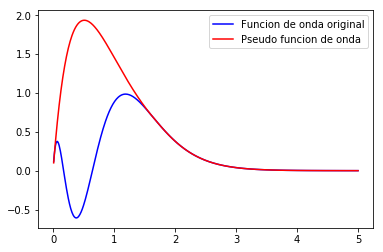

In [72]:
# Busco punto de inflexion para usar como rc donde pegar mi funcion de onda real con la pseudo funcion de onda 

dx = x[1]-x[0]
d2psi3n = np.diff(x*psi3n,n=2)/dx**2
dpsi3n = np.diff(x*psi3n)/dx

# Las raices de la derivada segunda son los puntos de inflexion
# Busco las raices viendo donde la funcion pasa de positiva a negativa

raices = [] # Voy juntando los indices donde hay puntos de inflexion
for i in range(len(d2psi3n)-1):
    if d2psi3n[i+1]*d2psi3n[i] < 0:
        raices.append(i)

# Solo me interesa el ultimo punto de inflexion
ic = raices[-1]

# Ajusto los valores de a y b para que mi pseudo funcion se una con mi funcion de onda
# Hago que coincidan en la funcion y en la derivada

pseudo_psi3n = np.zeros((nsize))

rc = x[ic] # Valor de x en el punto de inflexion
xc = rc*psi3n[ic] # Valor de x*psi3n en rc
vc = dpsi3n[ic] # Valor de la derivada de x*psi3n en rc

b = (1./rc)-(vc/xc)
a = (xc/rc)*np.exp(b*rc)


for i in range(nsize):
    if i < ic:
        pseudo_psi3n[i] = pseudo_psi(a,b,x[i])
    else:
        pseudo_psi3n[i] = x[i]*psi3n[i]
        
plt.plot(x,x*psi3n,'b-',label="Funcion de onda original")
plt.plot(x,pseudo_psi3n,'r-',label="Pseudo funcion de onda")
plt.legend()
plt.show()

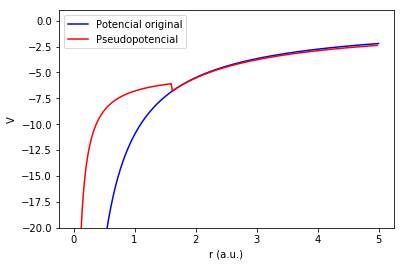

In [71]:
# Invierto ec de Schrödinger para sacar el Pseudopotencial

# Pseudopotencial
Vps = (0.5*np.diff(pseudo_psi3n,n=2)/dx**2) / pseudo_psi3n[:-2]

# Potencial original
V = -11/x

# Saco la energia viendo cuanto es el offset de ambos potenciales para que coincidan en rc
E = V[ic] - Vps[ic]

Vps += E

plt.plot(x,V,'b-',label="Potencial original")
plt.plot(x[:-2],Vps,'r-',label="Pseudopotencial")
plt.ylim([-20,1])
plt.legend()
plt.xlabel("r (a.u.)")
plt.ylabel("V")
plt.show()

El pseudopotencial no es continuo en rc. Puede ser que sea porque la pseudo funcion de onda que arme no pedi que sea continua en la segunda derivada.

In [69]:
E

-6.7640954804605187

La energia del fundamental del Sodio calculada con Fischer da: -161.859

Pero por como construi la funcion de onda original en realidad lo que estoy calculando es el atomo de Sodio con un solo electron en el estado 3s.

La energia que obtengo con Fischer calculando el atomo de Sodio con un solo electron en el estado 3s me da

-6.722

Lo cual coincide bastante bien con lo que me dio a mi.